In [1]:
import matplotlib.font_manager
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Disc Model")

Disc Model


## Data extraction

In here we are going to extract the values that we need from the columns of the txt file $'VelRad.txt'$. This data comes from the article of Chemin and al. from 2009 and will be used to model the disc of M31.

In [37]:
#Create some empty lists and an angle allowing us to plot ellipses
t = np.linspace(0, 2*np.pi, 3000)
x, y, z = [], [], [] #Contain the positions after the inclination but not after the PA rotation
a, b    = [], [] #semi-major axis and semi-minor axis
radius  = [] #Radius from the center in arcmin
PAang   = [] #Position angle in degrees
iang    = [] #Inclination angle in degrees
vel     = [] #Velocity in km/s
dens    = [] #Surface density in solar masses per parsec

#We first extract our data
f = open('VelRad.txt', 'r')

for line in f:
    columns = line.split()
    Test = True
    try:
        A = float(columns[0])/60
        B = float(columns[4])*np.pi/180
        C = float(columns[7])*np.pi/180
        D = float(columns[8])
        E = float(columns[10])
    except:
        Test = False
        
    if Test == True:
        radius.append(A)
        PAang.append(np.pi/2 - B)
        iang.append(C)
        vel.append(D)
        dens.append(E)
        
        
#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
for i in range(len(radius)):
    if radius[i] < 2.7:
        a.append(radius[i])
        b.append(radius[i]*np.cos(iang[i]))
        x.append(a[i]*np.cos(t))
        y.append(b[i]*np.sin(t))
        z.append(-radius[i]*np.sin(iang[i])*np.sin(t))
    else:
        break
        
X, Y, Z = [], [], []

#We treat the PA rotation independently now
for i in range(len(x)):
    X.append(x[i]*np.cos(PAang[i]) - y[i]*np.sin(PAang[i]))
    Y.append(x[i]*np.sin(PAang[i]) + y[i]*np.cos(PAang[i]))

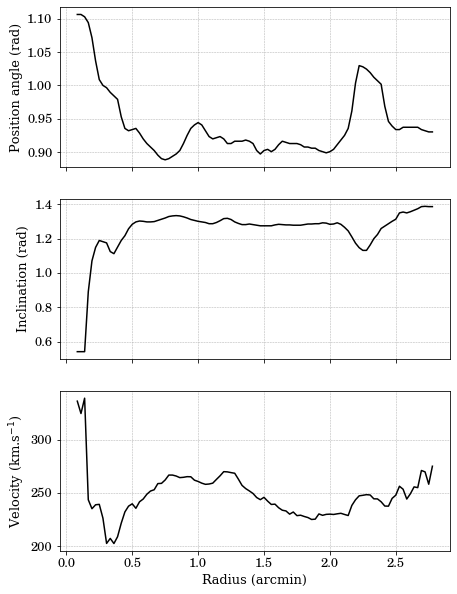

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(7, 10))

ax1.plot(radius, PAang, c='black')
ax1.set_ylabel('Position angle (rad)', fontname = 'Serif', size = 13)
ax1.grid(linestyle='--', linewidth ='0.5')
ax1.yaxis.set_tick_params(labelsize=13)

ax2.plot(radius, iang, c='black')
ax2.set_ylabel('Inclination (rad)', fontname = 'Serif', size = 13)
ax2.grid(linestyle='--', linewidth ='0.5')
ax2.yaxis.set_tick_params(labelsize=13)

ax3.plot(radius, vel, c='black')
ax3.set_xlabel('Radius (arcmin)', fontname = 'Serif', size = 13)
ax3.set_ylabel(r'Velocity (km.s$^{-1}$)', fontname = 'Serif', size = 13)
ax3.grid(linestyle='--', linewidth ='0.5')
ax3.xaxis.set_tick_params(labelsize=13)
ax3.yaxis.set_tick_params(labelsize=13)

#plt.savefig('PosIncVel.pdf')
plt.show()

## Representation of M31 model

Here we show how M31 should look based on the model and where the gradient represents the depth.

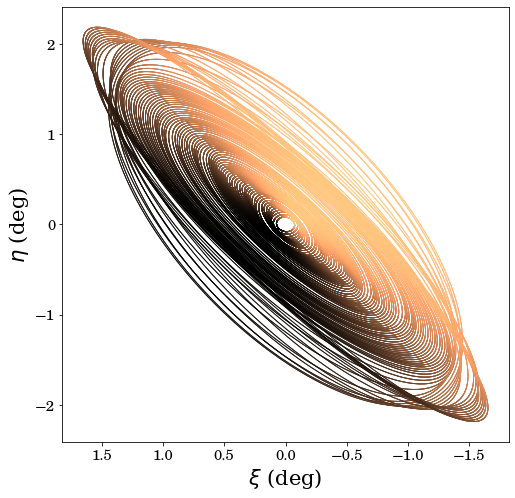

In [94]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
#plt.colorbar(label="Like/Dislike Ratio", orientation="vertical")
#plt.savefig('Ara.png', dpi=500)
plt.show()

## Ellipse check:

In [120]:
def EllipsesCrossed(X, Y, PA, a, b): #function that returns the number of ellipses crossed and their "identifier"
    COUNT = 0
    EllipseList = []
    
    def Condition(x, y, count, pa, A, B):
        R_rot1   = np.array([[np.cos(np.pi/2 - pa[count]), -np.sin(np.pi/2 - pa[count])], [np.sin(np.pi/2 - pa[count]), np.cos(np.pi/2 - pa[count])]])   
        Ell_rot1 = np.dot(R_rot1, [x, y]) 
        R_rot2   = np.array([[np.cos(np.pi/2 - pa[count-1]), -np.sin(np.pi/2 - pa[count-1])], [np.sin(np.pi/2 - pa[count-1]), np.cos(np.pi/2 - pa[count-1])]])   
        Ell_rot2 = np.dot(R_rot2, [x, y]) 
        
        if count == 0:
            if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1:
                Condition = True
            else:
                Condition = False

        else:
            if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1 and (Ell_rot1[0]**2)/(B[count-1]**2) + (Ell_rot1[1]**2)/(A[count-1]**2) >= 1:
                Condition = True

            else:
                Condition = False

        return Condition
    
    for i in range(len(a) - 1):
        IsIt = Condition(X, Y, i, PA, a, b)
        if IsIt == True:
            COUNT += 1
            EllipseList.append(i)
        else:
            continue

    return EllipseList

[2, 7]


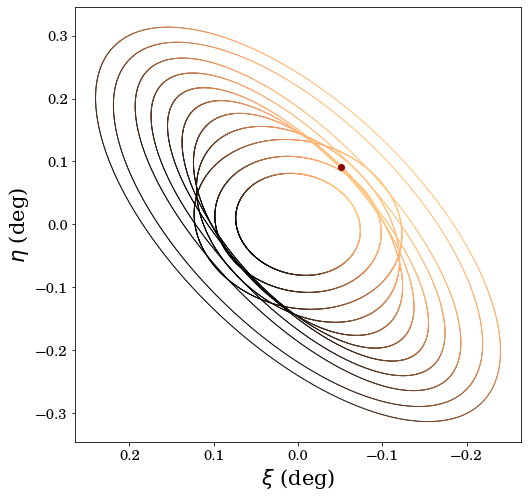

In [130]:
plt.figure(figsize=(8, 8))
for i in range(11):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
    
xrand = random.uniform(-1, 1)*0.19
yrand = random.uniform(-1, 1)*0.19

print(EllipsesCrossed(xrand, yrand, PAang, a, b))

plt.scatter(xrand, yrand, c='darkred')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
plt.show()

### Rapid check of the selection

Indeed the selection is made using the fact that we define the "area" between two ellipses by the area defined by the two neighbouring ones.

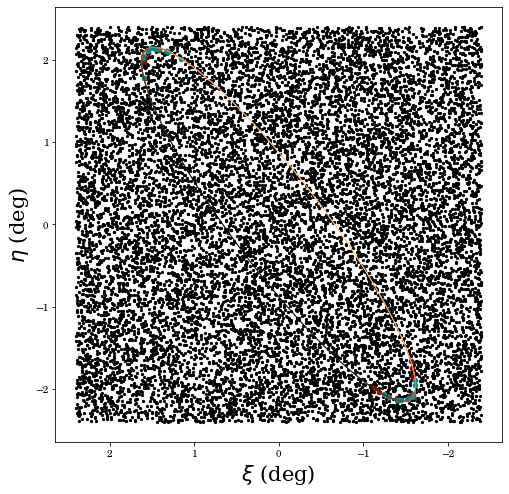

In [122]:
def Condition(x, y, count, pa, A, B):
    R_rot1   = np.array([[np.cos(np.pi/2 - pa[count]), -np.sin(np.pi/2 - pa[count])], [np.sin(np.pi/2 - pa[count]), np.cos(np.pi/2 - pa[count])]])   
    Ell_rot1 = np.dot(R_rot1, [x, y]) 
    R_rot2   = np.array([[np.cos(np.pi/2 - pa[count-1]), -np.sin(np.pi/2 - pa[count-1])], [np.sin(np.pi/2 - pa[count-1]), np.cos(np.pi/2 - pa[count-1])]])   
    Ell_rot2 = np.dot(R_rot2, [x, y]) 
    
    if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1 and (Ell_rot1[0]**2)/(B[count-1]**2) + (Ell_rot1[1]**2)/(A[count-1]**2) >= 1:
        Condition = True
        
    else:
        Condition = False
    
    return Condition

XRand, YRand = [], []

for i in range(15060):
    XRand.append(random.uniform(-1, 1)*2.4)
    YRand.append(random.uniform(-1, 1)*2.4)
    
In1X = [] #Empty list that will contain the X coordonnates of the points inside of the ellipse
In1Y = []
In2X = [] #Empty list that will contain the X coordonnates of the points inside of the ellipse
In2Y = []
OutX = [] #Empty list that will contain the X coordonnates of the points outside of the ellipse
OutY = []

EL1 = 91
EL2 = 92

for i in range(0, 15060): #Verifies if a point is inside or ouside
    if (Condition(XRand[i], YRand[i], EL1, PAang, a, b) == True):
        In1X.append(XRand[i])
        In1Y.append(YRand[i])
        
    if (Condition(XRand[i], YRand[i], EL2, PAang, a, b) == True):
        In2X.append(XRand[i])
        In2Y.append(YRand[i])
        
    else:
        OutX.append(XRand[i])
        OutY.append(YRand[i])
        
plt.figure(figsize=(8, 8))
plt.scatter(OutX, OutY, c='black', s=5)
plt.scatter(In1X, In1Y, c='darkred', s=20)
plt.scatter(In2X, In2Y, c='darkcyan', s=20)
plt.scatter(X[EL2], Y[EL2], c=-z[EL2], cmap='copper', s=1, linewidth=0)
#plt.scatter(-0.12789997597689204, -0.17891212807791168, c="red", s=0.5)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
plt.show()

## Weighted average

In this section what we would like to get is the following. Basically, what we have for now is the number of ellipses crossed at a given position in space, but we remind that we would like to return a single velocity. To do so, we weight the velocities given for the different ellipses based on their surface densities.

In [64]:
def AvgWeight(EllList, Dens): #takes as argument a list of the ellipses crossed and the densities of ALL the ellipses
    velocity = 0
    totell   = len(EllList) #total number of ellipses crossed
    
    if totell == 0:
        velocity = 0
        
    else: 
        SumDens = 0 #Sum of the different densities of the different ellipses
        for i in range(totell):
            SumDens += Dens[EllList[i]]           
        
        Weights = []
        for i in range(totell):
            Weights.append((Dens[EllList[i]])/SumDens)
            
        print(Weights)
        
El = EllipsesCrossed(xrand, yrand, PAang, a, b)
AvgWeight(El, dens)

[1.0]


## Test of velocity for a face on circle

We will here test to recover the velocities along the $\alpha$ and $\delta$ components for objects all having a velocity of constant norm equal to 42km.s$^{-1}$ and belonging to a disc seen face on.

In [10]:
def Angle02pi(angle, x, y, vel):
    velcom = []
    if x < 0 and y > 0:
        angle = (np.pi/2 + angle) + np.pi/2 
    if x < 0 and y < 0:
        angle += np.pi
    if x > 0 and y < 0:
        angle += 2*np.pi
    else:
        angle *= 1
        
    velcom.append(-vel*np.sin(angle))
    velcom.append(vel*np.cos(angle))
    
    return velcom

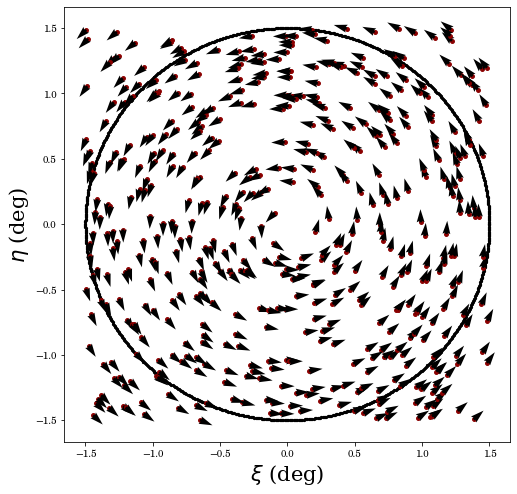

In [57]:
#Create some empty lists and an angle allowing us to plot ellipses
ttest  = np.linspace(0, 2*np.pi, 1000)
xtest, ytest = [], []
velo   = 0.1
velcom = []

XRanD, YRanD = [], []

#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
xtest.append(1.5*np.cos(ttest))
ytest.append(1.5*np.sin(ttest))

#Random numbers for the test
for i in range(500):
    XRanD.append(random.uniform(-1, 1)*1.5)
    YRanD.append(random.uniform(-1, 1)*1.5)
    AnglE  = np.arctan(YRanD[i]/XRanD[i])
    velcom.append(Angle02pi(AnglE, XRanD[i], YRanD[i], velo))
    
plt.figure(figsize=(8, 8))
plt.scatter(xtest, ytest, c='black', s=5)
for i in range(len(XRanD)):
    plt.scatter(XRanD[i], YRanD[i], c='darkred', s=15)
    plt.quiver(XRanD[i], YRanD[i], velcom[i][0], velcom[i][1], angles='xy', scale_units='xy', scale=1)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.show()

## Making bins

The first step is to make bins in which we will then create a series of points that will then allow us to determine a sort of average value in a given cell. The number of cells in both the $\xi$ and $\eta$ directions are defined by the variables nb_x_bins (-1, hence for nb_x_bins = 3 we only have 2) and the number of points in each cells is N (-2 because of the two boundary values on each side).

In [12]:
def matrix(cell_bounds_min_x, cell_bounds_max_x, cell_bounds_min_y, cell_bounds_max_y, n): 
    #This function creates a meshgrid, its arguments are boundaries on the x and y axis
    #for each of the sub-cells that we've created we take n points inside  
    x_coord = []
    y_coord = []
    
    xedge   = np.linspace(cell_bounds_min_x, cell_bounds_max_x, n)
    yedge   = np.linspace(cell_bounds_min_y, cell_bounds_max_y, n)

    for i in range(1, n-1):
        for j in range(1, n-1):
            x_coord.append(xedge[j])
            y_coord.append(yedge[i])
            
    return x_coord, y_coord

In [52]:
def mesh(nb_x_bins, nb_y_bins, n_points_bin):
    edgex = np.linspace(-1.8, 1.8, nb_x_bins)
    edgey = np.linspace(-2.35, 2.35, nb_y_bins)

    edge_x = []
    edge_y = []

    for i in range(nb_x_bins - 1):
        edge_x.append([edgex[i], edgex[i+1]])
        
    for i in range(nb_y_bins - 1):
        edge_y.append([edgey[i], edgey[i+1]])

    xcoord, ycoord = [], []

    for i in range(len(edge_x)):
        for j in range(len(edge_y)):
            R, B = matrix(edge_x[i][0], edge_x[i][1], edge_y[j][0], edge_y[j][1], n_points_bin)
            xcoord.append(R)
            ycoord.append(B)
            
    return xcoord, ycoord

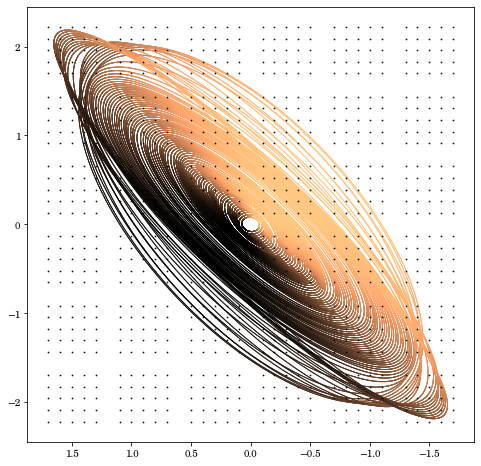

In [54]:
xcoord, ycoord = mesh(7, 7, 7)
       
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
plt.scatter(xcoord, ycoord, s=0.5, c='k')
plt.gca().invert_xaxis()
plt.show()

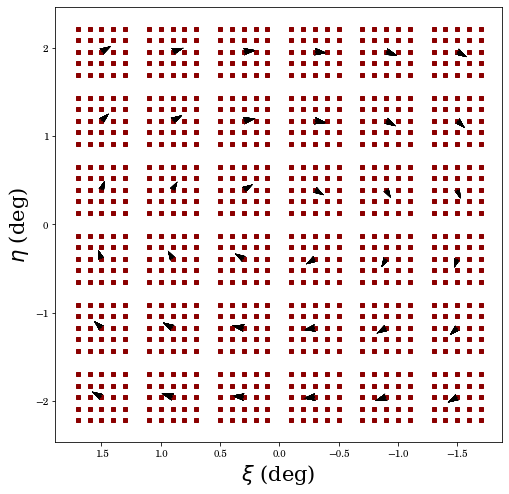

In [60]:
def velocity(xcoord, ycoord):
    velcom = [] #will contain the velocities of all the points inside of the bin
    velbin = [] #Stores only the averaged velocity of all the points in the bin
    for i in range(len(xcoord)):
        velcom.append([])
        velbin.append([])
        vel_x = 0 #intermediate variable to calculate the average velocity in a given cell
        vel_y = 0
    
        for j in range(len(xcoord[0])):
            AnglE  = np.arctan(ycoord[i][j]/xcoord[i][j])
            velcom[i].append(Angle02pi(AnglE, xcoord[i][j], ycoord[i][j], velo)) 
            vel_x += velcom[i][j][0]
            vel_y += velcom[i][j][1]
        
        velbin[i].append(vel_x/len(xcoord[0]))
        velbin[i].append(vel_y/len(xcoord[0]))
        
    return velbin

vel = velocity(xcoord, ycoord)

plt.figure(figsize=(8, 8))
for i in range(len(xcoord)):
    for j in range(len(xcoord[0])):
        plt.scatter(xcoord[i], ycoord[i], c='darkred', s=15)
        plt.quiver(xcoord[i][int(len(xcoord[0])/2 - 1/2)], ycoord[i][int(len(xcoord[0])/2 - 1/2)], vel[i][0], 
        vel[i][1], angles='xy', scale_units='xy', scale=1)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
plt.show()

Just for clarity, we will quickly explain the notation of xcoord\[\]\[\]. In that notation the first \[\] designates the cell in wich we are and while the second designates the points inside the cell which will be used to evaluate the global trend of the vectors.

For the velcom list it's exactly the same except that the third \[\] is used to determine if it is the component of velocity along the x or the y axis (in our case more precisely along the $\xi$ or $\eta$ axis).

## Associate the velocities with the points of the mesh

In [132]:
EllListCrossed = []
for i in range(len(xcoord)):
    EllListCrossed.append([])
    for j in range(len(xcoord[0])):
        EllListCrossed[i].append(EllipsesCrossed(xcoord[i][j], ycoord[i][j], PAang, a, b))

print(EllListCrossed[0])

[[], [], [], [], [], [], [93], [90], [90], [91], [], [91], [], [84], [82], [], [91], [], [83], [79], [], [], [], [], [75, 76, 77]]
